# Normal Distribution

Also known as a `bell curve` or `Gaussian distribution`, a `normal distribution` is a continuous probability distribution that is symmetrical on both sides of the mean and bell-shaped.

The closer a value is to the mean, the more likely it is to occur and the farther it is from the mean, the less likely it is to occur.

The distance of a data point from the mean is measured in standard deviations.

### Features of a normal distribution

* shape is a bell curve
* mean is located at the center of the curve
* peak occurs at the mean
* curve is symmetric on both sides of the center
* standard deviation defines the shape i.e.
    * a smaller standard deviation results in a narrow and tall curve
    * a larger standard deviation results in wide and short curve
* area under the curve(AUC) = 1 i.e AUC accounts for 100% of the outcomes possible in the distribution.
* mean = median = mode

In [1]:
# importing necessary libraries and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
# reading in the dataset
df=pd.read_csv('HR-Employee-Attrition.csv')

# avoiding column truncation
pd.set_option('display.max_columns',None)

# first 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# statistical summary

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


During my own exploration of this dataset, I discovered that the `Age` column appeared normally distributed. As such it will be the focus of this notebook as I show what a normal distribution is and demonstrate how to verify it statistically.

<AxesSubplot:ylabel='Frequency'>

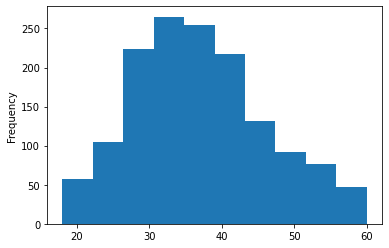

In [5]:
# a histogram of the column of interest

df['Age'].plot(kind='hist')

The plot looks bell_shaped with a slight skew to the right. 

Another way to visually check if the data is normally distributed is to create and inspect a QQ (quantile-quantile) plot.

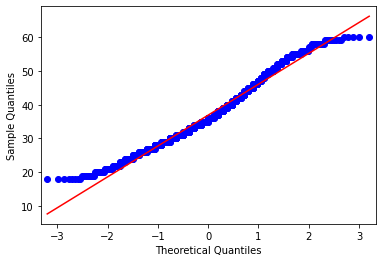

In [6]:
# a qq plot from statsmodels

fig=sm.qqplot(df['Age'],line='s')

Most of the points in the QQ plot follow a straght line which indicates that the data should follow a normal distribution.

Statistical tests to confirm this are needed as the eye test is not enough to confirm that `age` is normally distributed.

### Empirical rule

It states that for a given dataset with a normal distribution:
* **68%** of the values lie within 1 standard deviation of the mean
* **95%** of the values lie within 2 standard deviations of the mean
* **99.7%** of the values lie within 3 standard deviations of the mean

In [7]:
# mean and standard deviation of the age column

age_mean=df['Age'].mean()
age_std=df['Age'].std()

print('Mean: {}'.format(age_mean))
print('Standard deviation: {}'.format(age_std))

Mean: 36.923809523809524
Standard deviation: 9.135373489136732


`1 standard deviation`

In [8]:
# what percentage of the ages lie within 1 standard deviation of the mean?

upper_limit = age_mean + 1*age_std
print('upper limit: {}'.format(upper_limit))

lower_limit = age_mean - 1*age_std
print('lower limit: {}'.format(lower_limit))

std_1=((df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)).mean()
print('Percentage of data that falls within 1 std of the mean: {}'.format(std_1*100))

upper limit: 46.05918301294626
lower limit: 27.78843603467279
Percentage of data that falls within 1 std of the mean: 69.38775510204081


`2 standard deviations`

In [9]:
# what percentage of the ages lie within 12 standard deviations of the mean?

upper_limit = age_mean + 2*age_std
print('upper limit: {}'.format(upper_limit))

lower_limit = age_mean - 2*age_std
print('lower limit: {}'.format(np.round(lower_limit,2)))

std_2=((df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)).mean()
print('Percentage of data that falls within 2 stds of the mean: {}'.format(std_2*100))

upper limit: 55.19455650208299
lower limit: 18.65
Percentage of data that falls within 2 stds of the mean: 96.25850340136054


`3 standard deviations`

In [10]:
# what percentage of the ages lie within 3 standard deviations of the mean?

upper_limit = age_mean + 3*age_std
print('upper limit: {}'.format(upper_limit))

lower_limit = age_mean - 3*age_std
print('lower limit: {}'.format(lower_limit,2))

std_3=((df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)).mean()
print('Percentage of data that falls within 3 stds of the mean: {}'.format(std_3*100))

upper limit: 64.32992999121973
lower limit: 9.517689056399327
Percentage of data that falls within 3 stds of the mean: 100.0


### Results and evaluation

After applying the empirical rule:
* about `69.39%` of the data points fall within 1 standard deviation of the mean
* about `96.23%` of the data points fall within 2 standard deviations of the mean
* `100%` of the data points fall within 3 standard deviations of the mean

69.39 is close to 68, 96.23 is close to 95 and 100 is close to 99.7. `Age` can therefore be considered approximately normal.

Knowing the location of values in a normal distribution is useful for detecting outliers. Values that lie more than 3 standard deviations above or below the mean are considered outliers.

According to the empirical rule test I did above, 100% of the points in the data lie within 3 standard deviations of the mean. This means that there are no outliers.

This can be confirmed using the **z-score** and visualized in a boxplot.

## z-score

`z-score` is a measure of how many standard deviations below or above the population mean a data point is.

`z-score` is approximately zero if the value is equal to the population mean.

A `positive` z-score shows a value is `greater than` the mean.

A `negative` z-score shows a value is `less than` the mean.

`z-score` is based on the `standard normal distribution` which has a mean of `0 (zero)` and a standard deviation of `1 (one)`.

`z-scores` range from -3 to 3.

`SciPy` can be used to calculate the z-score.

In [11]:
# creating a Z_score column from the Age column

df['Z_score'] = stats.zscore(df['Age'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Z_score
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0.446350
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1.322365
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0.008343
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,-0.429664
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,-1.086676


In [12]:
# showing the portion the dataframe where the Age value is an outlier

df[(df['Z_score']<-3) | (df['Z_score']>3)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Z_score


### Results and evaluation
Our boolean mask desgined to reveal outliers returned an empty dataframe meaning there are no outliers.

A boxplot will further reinforce this finding.

<AxesSubplot:xlabel='Age'>

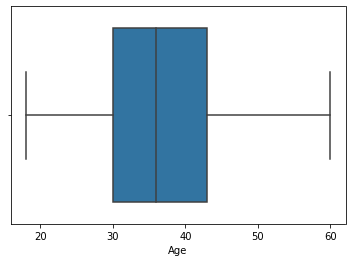

In [13]:
# a boxplot of the Age column

sns.boxplot(x='Age',data=df)

If the age data had outliers, they would have shown up beyond the whiskers.

## Conclusion

The `age` data is approximately normally distributed and does not have outliers.